<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#lib-load" data-toc-modified-id="lib-load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>lib load</a></span></li><li><span><a href="#Qubit-def" data-toc-modified-id="Qubit-def-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Qubit def</a></span></li><li><span><a href="#Fi-ext-list" data-toc-modified-id="Fi-ext-list-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fi ext list</a></span></li><li><span><a href="#Exp-data" data-toc-modified-id="Exp-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exp data</a></span><ul class="toc-item"><li><span><a href="#1/S" data-toc-modified-id="1/S-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>1/S</a></span></li><li><span><a href="#S" data-toc-modified-id="S-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>S</a></span></li></ul></li><li><span><a href="#S(w)-fitting" data-toc-modified-id="S(w)-fitting-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>S(w) fitting</a></span></li><li><span><a href="#Extracted-S(w)" data-toc-modified-id="Extracted-S(w)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extracted S(w)</a></span><ul class="toc-item"><li><span><a href="#T1-vs-E" data-toc-modified-id="T1-vs-E-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>T1 vs E</a></span></li><li><span><a href="#T1-vs-ng" data-toc-modified-id="T1-vs-ng-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>T1 vs ng</a></span></li><li><span><a href="#Playing-with-parameters" data-toc-modified-id="Playing-with-parameters-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Playing with parameters</a></span></li></ul></li></ul></div>

assymetry
dispesive shift for e and 2e
T1


In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
color = next(ax._get_lines.prop_cycler)['color']

## lib load

In [ ]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import numpy as np

from ACqubit import *
from ACstate import *
from wavefunction1d import *

#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm

from scipy.interpolate import interp1d

pi = np.pi

## Qubit def

In [ ]:
# ACQB15 = ACQubit (E_CL = 15, 
#               E_L = 0.87, 
#               E_J = (J1+J2)/2, 
#               E_C = 7,
#               dE_J = (J2-J1)/2 )


J1 = 33
J2 = 1*J1+13

ACQB15 = ACQubit (E_CL = 15, 
              E_L = 0.87, 
              E_J = (J1+J2)/2, 
              E_C = 8,
              dE_J = (J2-J1)/2 )

bands = [0,1,2]
  #  fig ,ax_spec, axes, axes2 = ACQB15.plot_bands_Psi(fi_ext_list = fi_ext_list, ng_list = [  0.5], bands = bands)    


In [ ]:
ACQB15.plot_bands_Psi(  fi_ext_list, [0, 0.5],  [0,1] )

In [ ]:
np.unique(flux['0e'])

In [ ]:
ax = ACQB15.plot_spectrum(fi_ext_list = 2*pi*np.unique(flux['0e']), ng_list = [ 0 ], bands = [[1]]) 
ACQB15.plot_spectrum(fi_ext_list = 2*pi*np.unique(flux['1e']), ng_list = [  0.5 ], bands = [[1]], ax = ax ) 

ax.plot(flux['0e'], E['0e'], 'o' )
ax.plot(flux['1e'], E['1e'], 'x' )

# ax.set_yscale('log')

## Fi ext list

In [ ]:
    Nfi_ext = 51
    fi_ext_min, fi_ext_max = [-0*pi, 1*pi]
    fi_ext_list = np.linspace(fi_ext_min, fi_ext_max, Nfi_ext)[:]
    dfi_ext = ( fi_ext_max - fi_ext_min ) /Nfi_ext

## Exp data

In [426]:
fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'

ng_exp = ['0e', '1e']
flux0 = 2*60e-6

flux= dict()
T1 = dict()
E = dict()

T1_un = dict()
E_un = dict()
flux_un = dict()

for ng in ng_exp:
    
    data = np.genfromtxt(fdir+ f'B15_T1vsB_{ng}.dat')



    flux[ng] = data[:,0]/flux0
    T1[ng] = data[:,1]*1e-6
    E[ng] = data[:,2]

    
    ind_E_un = get_dup( E[ng] )
    E_un[ng] = np.unique( E[ng] )
    flux_un[ng] = np.array( [flux[ng][i] for i in sorted(np.unique(flux[ng], return_index=True)[1])]  )

    T_un_ = []
    for ind in ind_E_un:
    #     print(ind)
        T_un_.append( np.max(  T1[ng][ind]  ) )

    T1_un[ng] = np.array(T_un_)

print(flux['1e'], flux_un['1e'])



[ 0.5         0.5         0.5         0.5         0.5         0.48333333
  0.48333333  0.48333333  0.43333333  0.4         0.4         0.4         0.4
  0.4         0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.31666667  0.31666667  0.31666667  0.3125      0.3125      0.3125
  0.3125      0.3125      0.30833333  0.30833333  0.30833333  0.30416667
  0.275       0.275       0.275       0.275       0.275       0.275
  0.26666667  0.26666667  0.26666667  0.26666667  0.26666667  0.26666667
  0.26666667  0.26666667  0.26666667  0.26666667  0.26666667  0.26666667
  0.26666667  0.26666667  0.26666667  0.26666667  0.26666667  0.26666667
  0.26666667  0.25        0.25        0.25        0.25        0.25        0.25
  0.23333333  0.23333333  0.23333333  0.23333333  0.23333333  0.23333333
  0.23333333  0.18333333  0.18333333  0.18333333  0.1         0.1         0.1
  0.1         0.1         0.08333333  0.08333333  0.08333333  0.08333333
  0.08333333  0.08333333  0.06666667  0.0666

In [427]:
E_un['0e']

array([  2.1 ,   2.2 ,   2.61,   3.8 ,   5.7 ,   6.3 ,   6.4 ,   6.6 ,
         6.7 ,   7.5 ,   7.8 ,   8.18,   8.35,  11.8 ,  12.4 ,  12.85,
        13.4 ,  13.85,  14.4 ,  15.25,  15.5 ])

In [413]:
data = np.genfromtxt(fdir+ f'B15_T1vsV.dat')

Vg_2e = 2*0.54

Vg = data[:,0]/Vg_2e
T1Vg = data[:,1]*1e-6

ind_Vg_un = get_dup( Vg )
Vg_un = np.unique( Vg )
TVg_un_ = []
for ind in ind_Vg_un:
#     print(ind)
    TVg_un_.append( np.max(  T1Vg[ind]  ) )

T1Vg_un = np.array(TVg_un_)


<IPython.core.display.Javascript object>


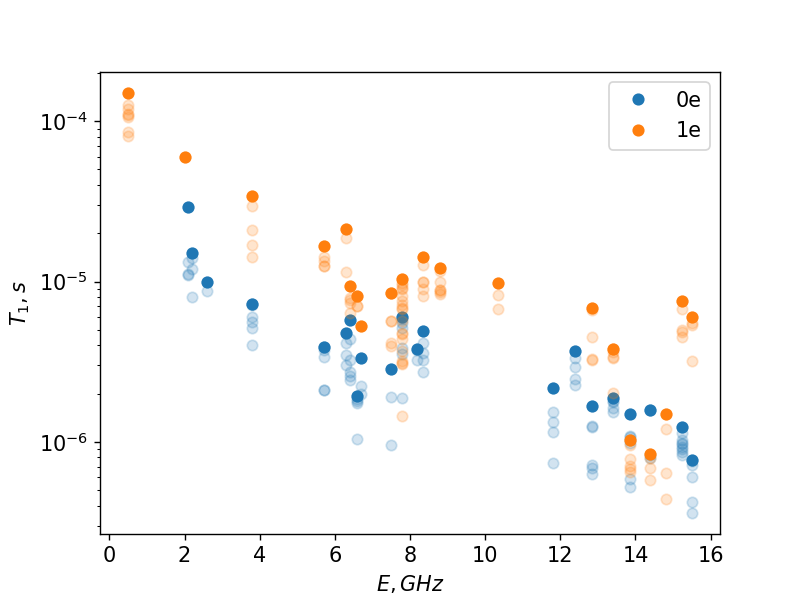

In [414]:
fig, ax = plt.subplots()

# color = next(ax._get_lines.prop_cycler)['color']
# ax_color_cycle = ax._get_lines.color_cycle


for ng in ['0e', '1e']:
    color = next(ax._get_lines.prop_cycler)['color']
    ax.plot(E[ng], T1[ng], 'o', color = color, alpha = 0.2 )
    ax.plot(E_un[ng], T1_un[ng], 'o', color = color, label = ng )





ax.set_yscale('log')

ax.set_xlabel('$E, GHz$')
ax.set_ylabel(r'$T_1,  s$')

ax.legend()

### 1/S

<IPython.core.display.Javascript object>


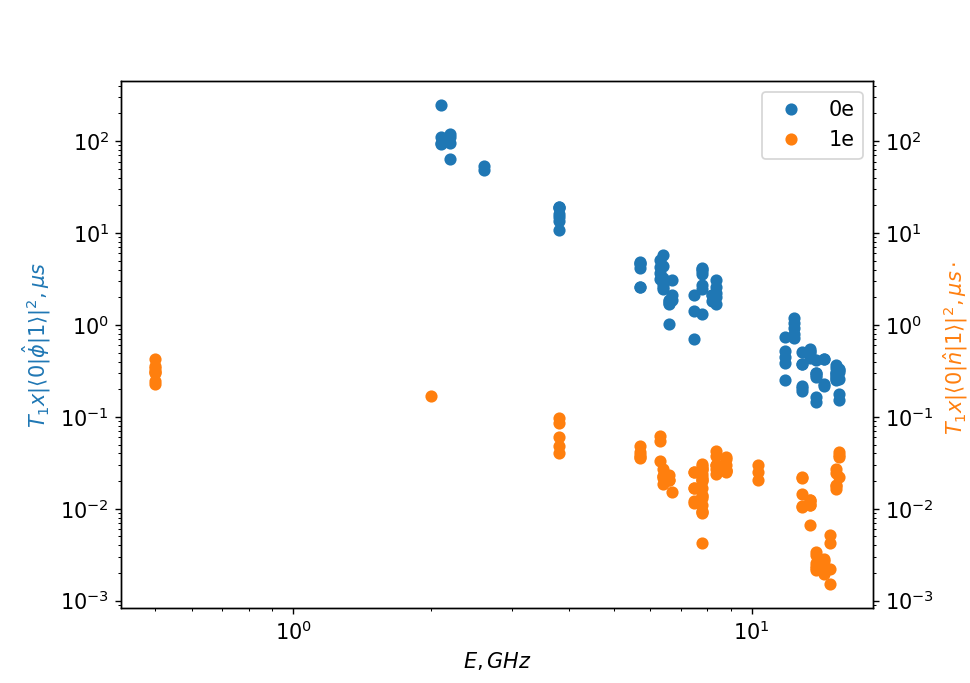

In [415]:
S = []
for f, t1 in zip( flux['0e'], T1['0e'] ) :
    st = ACQB15.set_state(fi_ext = 2*pi*f, ng = 0)
#     S.append( st.get_fi_ij(0,1)**2 * t1 * .87**2 )
    S.append( st.get_fi_ij(0,1)**2 * t1  )
    
fig, ax = plt.subplots()
ax.plot(E['0e'], 1e6*np.array(S), 'o', label = '0e')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel (r'$ E, GHz $ ')
ax.set_ylabel (r'$ {T_1 x |\langle 0| \hat{\phi}|1 \rangle|^2 }  , \mu s  $ ', color = 'C0') 
ax.legend()

x = np.linspace(.5, 16, 101)


# ax2 = ax.twinx()
# ax2.set_yscale('log')
# ax.plot( x, .40*x**1  )
ax.legend()

In [416]:
S = []
for f, t1 in zip( flux['1e'], T1['1e'] ) :
    st = ACQB15.set_state(fi_ext = 2*pi*f, ng = 0.5)
#     S.append( st.get_n_ij(0,1)**2 * t1 * 7**2)
    S.append( st.get_n_ij(0,1)**2 * t1)
    
# fig, ax = plt.subplots()



ax.plot(E['1e'], 1e6*np.array(S), 'o', color = 'C1', label = '1e')
ax.set_yscale('log')

ax.set_xlabel (r'$ E, GHz $ ')
# ax.set_ylabel (r'$ T_1 x |\langle 0| \hat{n}|1 \rangle|^2 ,\mu s $ ') 
ax.legend()

x = np.linspace(.5, 16, 101)


# ax2 = ax.twinx()
# ax2.set_yscale('log')
# ax.plot( x, .08*x**-1  )
ax.legend()

In [417]:
ax2 = ax.twinx()
lim = ax.get_ylim()


ax2.set_ylim(lim)
ax2.set_yscale('log')
ax2.set_ylabel (r'$ {T_1 x |\langle 0| \hat{n}|1 \rangle|^2 }   , \mu s \cdot  $ ', color = 'C1')

Text(0,0.5,'$ {T_1 x |\\langle 0| \\hat{n}|1 \\rangle|^2 }   , \\mu s \\cdot  $ ')

### S

In [ ]:
def get_dup(records_array):
    vals, inverse, count = unique(records_array, return_inverse=True,
                                  return_counts=True)

    idx_vals_repeated = where(count > 0)[0]
    vals_repeated = vals[idx_vals_repeated]

    rows, cols = where(inverse == idx_vals_repeated[:, newaxis])
    _, inverse_rows = unique(rows, return_index=True)
    res = split(cols, inverse_rows[1:])
    
    return res

<IPython.core.display.Javascript object>


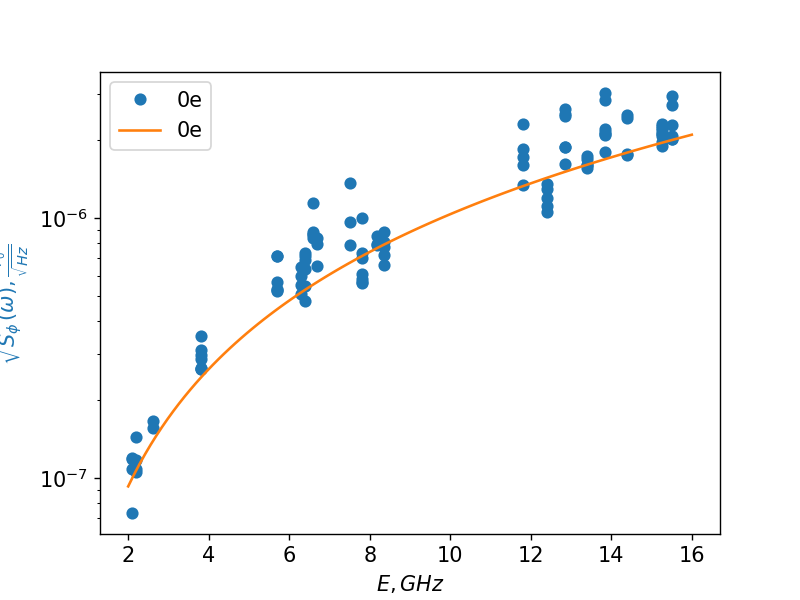

[  1.49802566 -17.23136759]


In [418]:
Sraw = []
for f, t1 in zip( flux['0e'], T1['0e'] ) :
    st = ACQB15.set_state(fi_ext = 2*pi*f, ng = 0)
#     S.append( st.get_fi_ij(0,1)**2 * t1 * .87**2 )
    Sraw.append( st.get_fi_ij(0,1)**2 * t1* ACQB15.E_L**2  )

S = np.sqrt(1e-18/np.array(Sraw))   
    
fig, ax = plt.subplots()
ax.plot(E['0e'], S, 'o', label = '0e')
ax.set_yscale('log')

ind_E_un = get_dup( E['0e'] )
E_un = np.unique( E['0e'] )

# print(ind_E_un)

S_un_ = []
for ind in ind_E_un:
#     print(ind)
    S_un_.append( np.min(  S[ind]  ) )

S_un = np.array(S_un_)

# ax.plot(E_un, S_un, 'X', label = '0e')


ax.set_xlabel (r'$ E, GHz $ ')
ax.set_ylabel (r'$ \sqrt{S_{\phi}}(\omega)  , \frac{\Phi_0}{\sqrt{Hz}}  $ ', color = 'C0') 
ax.legend()

x = np.linspace(2, 16, 101)


p = np.polyfit( np.log(E_un), np.log(S_un), 1 )

print(p)

fit = np.poly1d(p)

yx = np.interp(x, E_un, S_un )
# f = interp1d( E['0e'], np.sqrt(1e-18/np.array(S)) , 'linear')

ax.plot( x, np.exp(fit( np.log(x) )) , '-', label = '0e')


# ax2 = ax.twinx()
# ax2.set_yscale('log')
# ax.plot( x, .40*x**1  )
ax.legend()

In [ ]:
np.exp(-17.2)


<IPython.core.display.Javascript object>


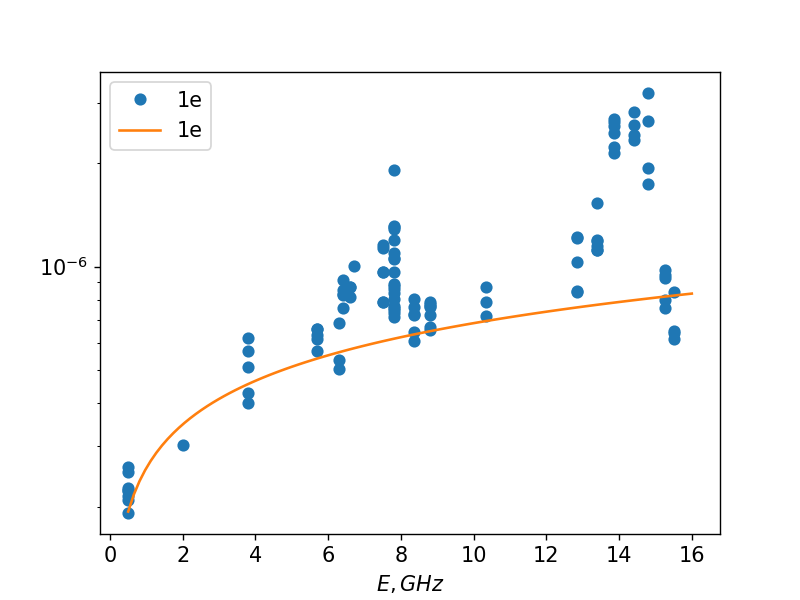

[  0.5    2.     3.8    5.7    6.3    6.4    6.6    6.7    7.5    7.8
   8.35   8.8   10.35  12.85  13.4   13.85  14.4   14.8   15.25  15.5 ]
[0 1 2 3 4 5 6 7]
[8]
[ 9 10 11 12 13]
[14 15 16 17 18]
[19 20 21]
[22 23 24 25 26]
[27 28 29]
[30]
[31 32 33 34 35 36]
[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55]
[56 57 58 59 60 61]
[62 63 64 65 66 67 68]
[69 70 71]
[72 73 74 75 76]
[77 78 79 80 81 82]
[83 84 85 86 87 88]
[89 90 91 92]
[93 94 95 96]
[ 97  98  99 100 101]
[102 103 104 105]
[  0.42161358 -15.16523247]


In [419]:
Sraw = []
for f, t1 in zip( flux['1e'], T1['1e'] ) :
    st = ACQB15.set_state(fi_ext = 2*pi*f, ng = 0.5)

    Sraw.append( st.get_n_ij(0,1)**2 * t1* ACQB15.E_C**2  )

S = np.sqrt(1e-18/np.array(Sraw))   
    
fig, ax = plt.subplots()
ax.plot(E['1e'], S, 'o', label = '1e')
ax.set_yscale('log')


ind_E_un = get_dup( E['1e'] )


E_un = np.unique( E['1e'] )

print(E_un)

S_un_ = []
for ind in ind_E_un:
    print(ind)
    S_un_.append( np.min(  S[ind]  ) )

S_un = np.array(S_un_)

# ax.plot(E_un, S_un, 'X', label = '1e')
x = np.linspace(0.5, 16, 101)


idx = where(S_un < 8e-7)[0]

p = np.polyfit( np.log(E_un[idx]), np.log(S_un[idx]), 1 )

print(p)

fit = np.poly1d(p)

yx = np.interp(x, E_un, S_un )
# f = interp1d( E['0e'], np.sqrt(1e-18/np.array(S)) , 'linear')

ax.plot( x, np.exp(fit( np.log(x) )) , '-', label = '1e')




# ax.plot(E['1e'], np.sqrt(1e-18/np.array(S)), 'o', color = 'C1', label = '1e')
# ax.set_yscale('log')

ax.set_xlabel (r'$ E, GHz $ ')
# ax.set_ylabel (r'$ T_1 x |\langle 0| \hat{n}|1 \rangle|^2 ,\mu s $ ') 
ax.legend()

x = np.linspace(.5, 16, 101)


# ax2 = ax.twinx()
# ax2.set_yscale('log')
# ax.plot( x, .08*x**-1  )
ax.legend()

In [ ]:
np.exp(-15.15)

In [ ]:
ax2 = ax.twinx()
lim = ax.get_ylim()


ax2.set_ylim(lim)
ax2.set_yscale('log')
# (r'$ \sqrt{S_{\phi}}(\omega)  , \frac{\Phi_0}{\sqrt{Hz}}  $ '
ax2.set_ylabel (r'$ \sqrt{S_{n}}(\omega)  , \frac{e}{\sqrt{Hz}}  $ ', color = 'C1')

## S(w) fitting 

In [ ]:
for n_st in ['0e', '1e']:
    print(len(flux_un[n_st]), len(E_un[n_st]) )

<IPython.core.display.Javascript object>


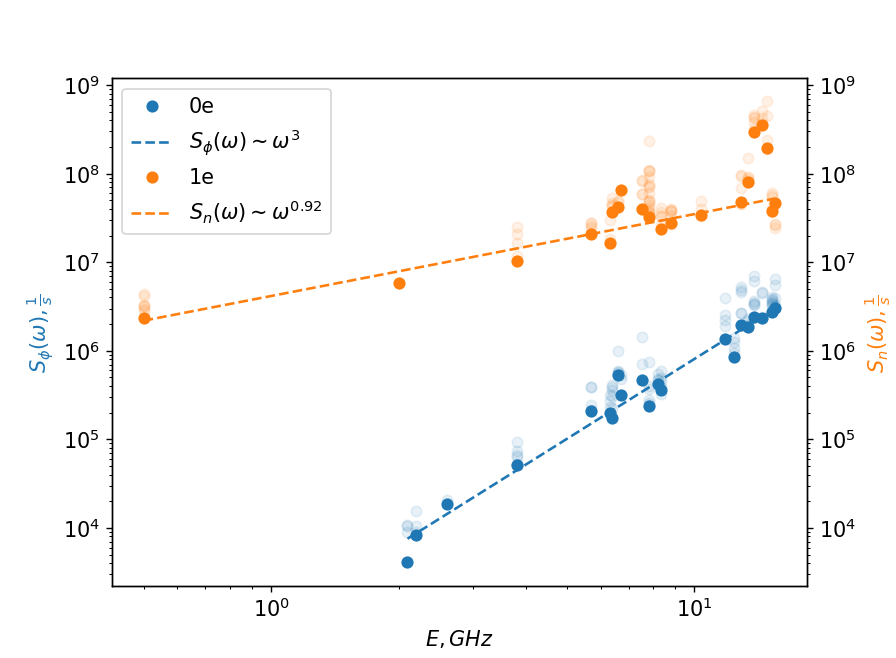

2.99633471763 816.235032941
0.925160735975 4155693.14608


Text(0,0.5,'$ S_{n}(\\omega)  , \\frac{1}{s}  $ ')

In [439]:
def get_T_mel(Q,n_st, flux, T1):
    T_mel = []
#     E_scale = {'0e': Q.E_L, '1e' : Q.E_C }
    E_scale = {'0e': 1, '1e' : 1 }

    ng = {'0e' : 0, '1e' : 0.5 }
    
    for f, t1 in zip( flux, T1 ) :
        st = ACQB15.set_state(fi_ext = 2*pi*f, ng = ng[n_st])
        
        if n_st == '0e':
            mel = st.get_fi_ij(0,1)
        elif n_st == '1e':
            mel = st.get_n_ij(0,1)
        else: 
            raise ValueError('n_st should be 0e or 1e') 
            
        T_mel.append( mel**2 * t1* E_scale[n_st]**2  )

    return np.array(T_mel)
    
fig, ax = plt.subplots()
S = dict()
S_un = dict()

for n_st in ['0e', '1e']:
    
    color = next(ax._get_lines.prop_cycler)['color']
    
    T_mel = get_T_mel(ACQB15 , n_st, flux[n_st], T1[n_st])
    S[n_st] = 1/T_mel   
    ax.plot(E[n_st], S[n_st], 'o',  alpha = 0.1, color = color)
    
    T_mel_un = get_T_mel(ACQB15 , n_st, flux_un[n_st], T1_un[n_st])
    S_un[n_st] = 1/T_mel_un   
    ax.plot(E_un[n_st], S_un[n_st], 'o', label = n_st, color = color)
    
    
    ax.set_yscale('log')
    ax.set_xscale('log')



    x = np.linspace(1, 16, 101)
    
    if n_st == '1e':
        idx = where(S_un[n_st] < 6.4e7)[0]
        p = np.polyfit( np.log(E_un[n_st] [idx]), np.log(S_un[n_st][idx]), 1 )

    else:
        
        p = np.polyfit( np.log(E_un[n_st]), np.log(S_un[n_st]), 1 )

    print(p[0], np.exp(p[1]))

    fit = np.poly1d(p)

#     yx = np.interp(x, E_un[n_st], S_un[n_st] )
#     # f = interp1d( E['0e'], np.sqrt(1e-18/np.array(S)) , 'linear')

    ax.plot( E_un[n_st], np.exp(fit( np.log(E_un[n_st]) )) , '--', color = color)


ax.lines[2].set_label(r'$S_{\phi}(\omega) \sim \omega^3$' )    
ax.lines[-1].set_label(r'$S_{n}(\omega) \sim \omega^{0.92}$' )    



ax.set_xlabel (r'$ E, GHz $ ')
# ax.set_ylabel (r'$ S_{\phi}(\omega)  , \frac{\Phi_0^2}{GHz}  $ ', color = 'C0') 
ax.set_ylabel (r'$ S_{\phi}(\omega)  , \frac{1}{s}  $ ', color = 'C0') 
ax.legend()


ax2 = ax.twinx()
lim = ax.get_ylim()


ax2.set_ylim(lim)
ax2.set_yscale('log')
ax2.set_ylabel (r'$ S_{n}(\omega)  , \frac{1}{s}  $ ', color = 'C1') 


## Extracted S(w)

In [ ]:
def Sn(w):
    return (64300)*w**0.93


def Sfi(w):
    return (1100)*w**3


<IPython.core.display.Javascript object>


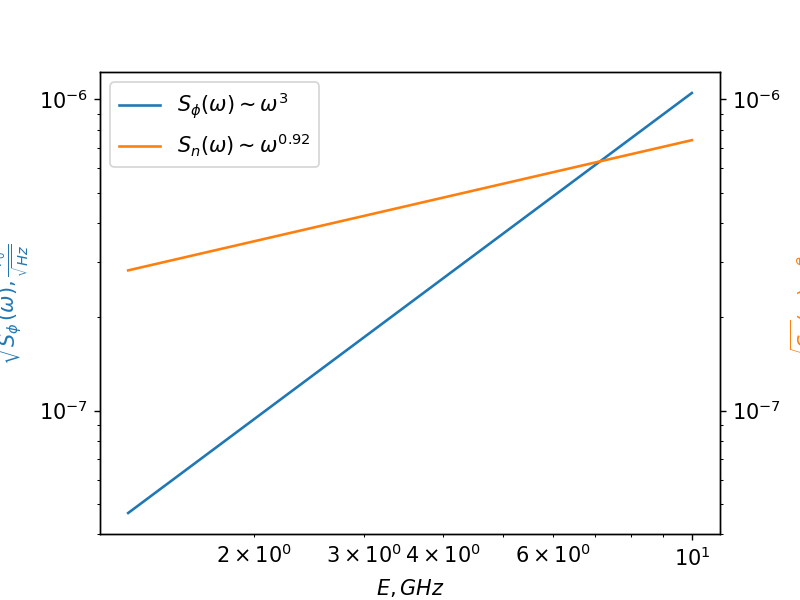

Text(0,0.5,'$ \\sqrt{S_{n}}(\\omega)  , \\frac{e}{\\sqrt{Hz}}  $ ')

In [420]:
w = np.logspace(0.1, 1, 201)

fig, ax = plt.subplots()
ax.plot(w, Sfi(w)**.5*1e-9, label = r'$S_{\phi}(\omega) \sim \omega^3$')
ax.plot(w, Sn(w)**.5*1e-9, label = r'$S_n(\omega)\sim \omega^{0.92}$')


ax.set_xlabel('$E, GHz$')
ax.set_ylabel (r'$ \sqrt{S_{\phi}}(\omega)  , \frac{\Phi_0}{\sqrt{Hz}}  $ ', color = 'C0') 

ax.set_xscale('log')
ax.set_yscale('log')

ax.legend()


ax2 = ax.twinx()
lim = ax.get_ylim()


ax2.set_ylim(lim)
ax2.set_yscale('log')
# (r'$ \sqrt{S_{\phi}}(\omega)  , \frac{\Phi_0}{\sqrt{Hz}}  $ '
ax2.set_ylabel (r'$ \sqrt{S_{n}}(\omega)  , \frac{e}{\sqrt{Hz}}  $ ', color = 'C1')

In [ ]:
Cc = 1.6e-19/10e-3


Cl = (1.6e-19)**2/2/15e9/6.64e-34
print(Cc)

# 4.2e-3*6.5e3/(Cc/(Cc+Cj))**2*(2*pi)**2 / 1e6

In [ ]:
816e-27 / (2*pi)**2 /(6.5e3) / Cc**2/  1e6

In [ ]:
(2*pi*1e9*Cl*6e3)**2*10e6/6e3 * 1e9

In [ ]:
(1e9*6.5e3*Cc)**2

In [ ]:


def get_T1(Q, fi_ext, ng, i = 0, j = 1):


    
    def get_T1_phi(Q, fi_ext, ng, i , j ):
 
        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        kT = 1 #GHz
        
        E = st.get_E()
        w = (E[j] - E[i])
        fi_ij = st.get_fi_ij(i, j)

        return   1/(   fi_ij**2 * Q.E_L**2 * Sfi(w) )   


    def get_T1_n(Q, fi_ext, ng, i , j ):

        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        E = st.get_E()
        w = (E[j] - E[i])
        n_ij = st.get_n_ij(i, j)
        
        return 1/( n_ij**2 * Q.E_C**2 * Sn(w) ) 
    
    st = Q.set_state(ng = ng,fi_ext = fi_ext)
    E = st.get_E()
    w = (E[j] - E[i])
 

    return w, 1/( 1/get_T1_phi(Q, fi_ext, ng, i = 0, j = 1) + 1/get_T1_n(Q, fi_ext, ng, i = 0, j = 1) )


In [429]:


def get_T1_M(Q, fi_ext, ng, i = 0, j = 1):

    
    Cc = 1.6e-19/10e-3

    Cj = (1.6e-19)**2/2/7e9/6.64e-34

    Cl = (1.6e-19)**2/2/15e9/6.64e-34

    Rq = 6.5e3
    
    R = 1.5e4
#     R = 1.5e0

    
    
    def get_T1_phi_M(Q, fi_ext, ng, i , j ):
 
        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        kT = 1 #GHz
        
        E = st.get_E()
        f = (E[j] - E[i])
        fi_ij = st.get_fi_ij(i, j)

        return   1/( (2*pi)**2 * (f*1e9*Rq*Cc)**2 * R/Rq * f*1e9*  fi_ij**2    )   


    def get_T1_n_M(Q, fi_ext, ng, i , j ):

        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        E = st.get_E()
        f = (E[j] - E[i])
        n_ij = st.get_n_ij(i, j)
        
        return 1/( (2*pi)**2*(Cc/(Cc+Cj))**2 * R/Rq* f*1e9*  n_ij**2    )
    
    st = Q.set_state(ng = ng,fi_ext = fi_ext)
    E = st.get_E()
    f = (E[j] - E[i])
 

    return f, 1/( 1/get_T1_phi_M(Q, fi_ext, ng, i = 0, j = 1) + 1/get_T1_n_M(Q, fi_ext, ng, i = 0, j = 1) )


### T1 vs E

<IPython.core.display.Javascript object>


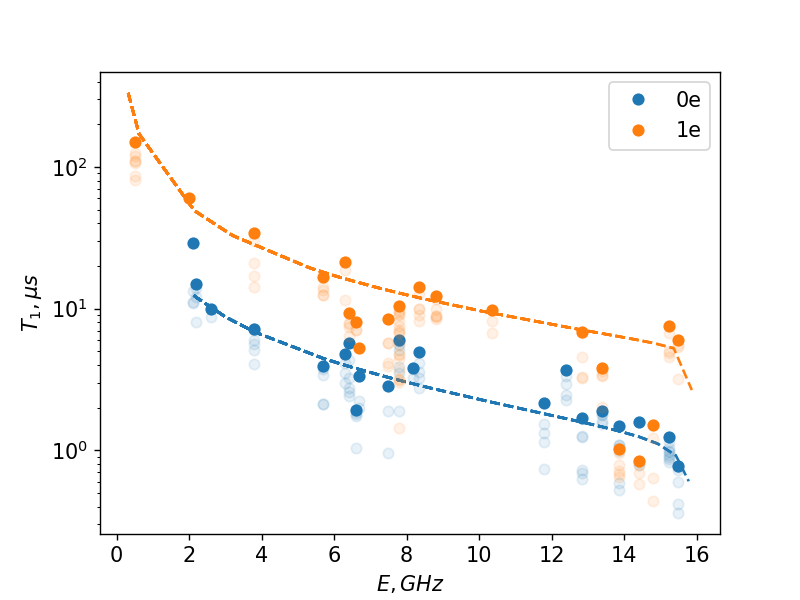

In [430]:
fig, ax = plt.subplots()

ng_map = {'0e' : 0, '1e' : 0.5 }

for ng in ['0e', '1e']:

    T_th = []
    E_th = []

    color = next(ax._get_lines.prop_cycler)['color']
    ax.plot(E[ng], T1[ng]*1e6, 'o', color = color, alpha = 0.1 )
    ax.plot(E_un[ng], T1_un[ng]*1e6, 'o', color = color, label = ng )

    for fi_ext in 2*np.pi*flux_un[n_st]:
        w, t = get_T1_M(ACQB15, fi_ext, ng_map[ng], i = 0, j = 1)
        T_th.append (t*1e6)
        E_th.append( w   )

        ax.plot(E_th, T_th, '--', color = color)



ax.set_yscale('log')
# ax.set_xscale('log')

ax.set_xlabel('$E, GHz$')
ax.set_ylabel(r'$T_1,  \mu s$')

ax.legend()

### T1 vs ng

<IPython.core.display.Javascript object>


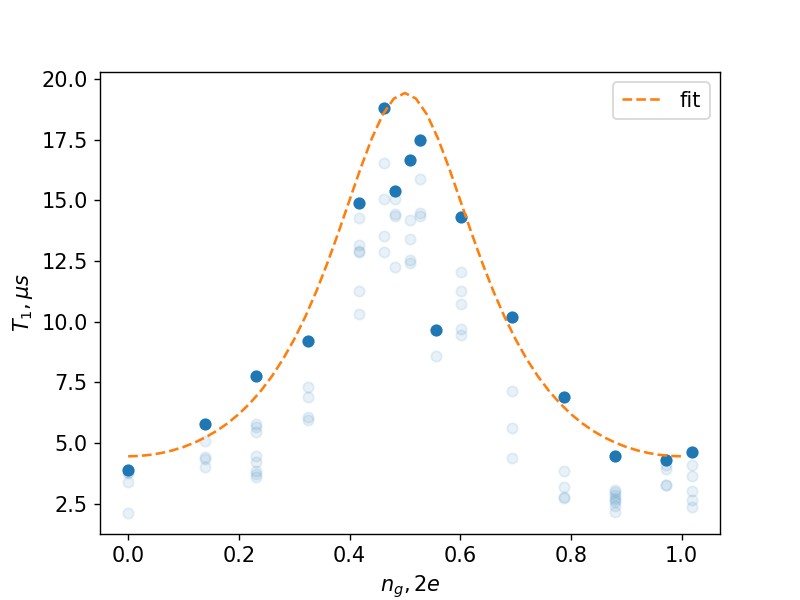

In [431]:
fig, ax = plt.subplots()
ax.plot(Vg, T1Vg*1e6, 'o', alpha = 0.1, color = 'C0')
ax.plot(Vg_un, T1Vg_un*1e6, 'o', color = 'C0' )


T = []

# ng_list = np.unique(Vg)
ng_list = np.linspace(0,1, 51)

for ng in ng_list:
    _, t = get_T1_M(ACQB15, fi_ext = 2*pi*4/6,ng = ng, i = 0, j = 1)
    T.append(t*1e6)
    
ax.plot(ng_list, T, '--', color = 'C1', label = 'fit')

# ax.set_yscale('log')

ax.set_xlabel('$n_g, 2e$')
ax.set_ylabel(r'$T_1,  \mu s$')

ax.legend()
    

### Playing with parameters

In [ ]:
R_list = np.logspace(3, 5, 101)

T_0 = []
T_1 = []

for r in R_list:
    _, t = get_T1_M(ACQB15,r, fi_ext = 2*pi*4/6,ng = 0, i = 0, j = 1)
    T_0.append(t*1e6)
    _, t = get_T1_M(ACQB15,r, fi_ext = 2*pi*4/6,ng = 0.5, i = 0, j = 1)
    T_1.append(t*1e6)
    
fig, ax = plt.subplots()
ax.plot(R_list, T_0, '-', label = '0e')    
ax.plot(R_list, T_1, '-', label = '1e')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'$T_1,  \mu s$')
ax.set_xlabel(r'$RC_c^2 (env. losses), a.u$')
    

In [406]:
(1.6e-19)**2/2/20e-15/6.64e-34 / 1e9


0.963855421686747

In [ ]:
C_list = np.logspace(-16,-13, 101)

T_0 = []
T_1 = []

for c in tqdm(C_list):
    J1 = 33
    J2 = 1*J1+13

    E_C = (1.6e-19)**2/2/c/6.64e-34 / 1e9
    
    Q = ACQubit (E_CL = 15, 
                  E_L = 0.87, 
                  E_J = (J1+J2)/2, #33
                  E_C = E_C,
                  dE_J = (J2-J1)/2 )  #6 
    
    
    _, t = get_T1_M(Q, c, fi_ext = 2*pi*4/6,ng = 0, i = 0, j = 1)
    T_0.append(t*1e6)
    _, t = get_T1_M(Q, c, fi_ext = 2*pi*4/6,ng = 0.5, i = 0, j = 1)
    T_1.append(t*1e6)
    
fig, ax = plt.subplots()
ax.plot(C_list, T_0, '-', label = '0e')    
ax.plot(C_list, T_1, '-', label = '1e')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'$T_1,  \mu s$')
ax.set_xlabel(r'$C_J , F$')
    

In [407]:
EL_list = np.logspace(-3 , 0, 101)

T_0 = []
T_1 = []

for EL in tqdm(EL_list):
    J1 = 33
    J2 = 1*J1+13

    E_C = (1.6e-19)**2/2/c/6.64e-34 / 1e9
    
    Q = ACQubit (E_CL = 15, 
                  E_L = EL, 
                  E_J = (J1+J2)/2, #33
                  E_C = 1,
                  dE_J = (J2-J1)/2 )  #6.5 
    
    
    _, t = get_T1_M(Q, 20e-15, fi_ext = 2*pi*4/6,ng = 0, i = 0, j = 1)
    T_0.append(t*1e6)
    _, t = get_T1_M(Q, 20e-15, fi_ext = 2*pi*4/6,ng = 0.5, i = 0, j = 1)
    T_1.append(t*1e6)
    

    

<IPython.core.display.Javascript object>


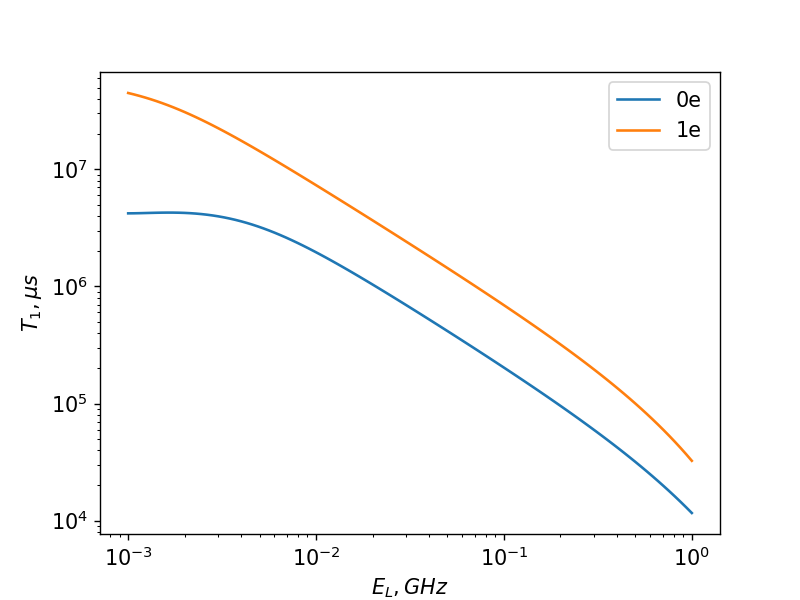

Text(0.5,0,'$E_L , GHz$')

In [408]:
fig, ax = plt.subplots()
ax.plot(EL_list, T_0, '-', label = '0e')    
ax.plot(EL_list, T_1, '-', label = '1e')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'$T_1,  \mu s$')
ax.set_xlabel(r'$E_L , GHz$')

<IPython.core.display.Javascript object>


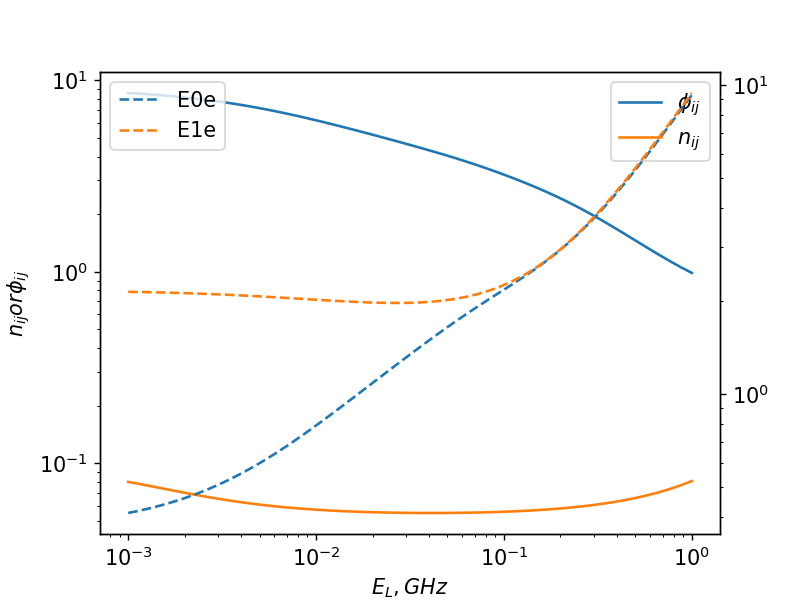

<IPython.core.display.Javascript object>


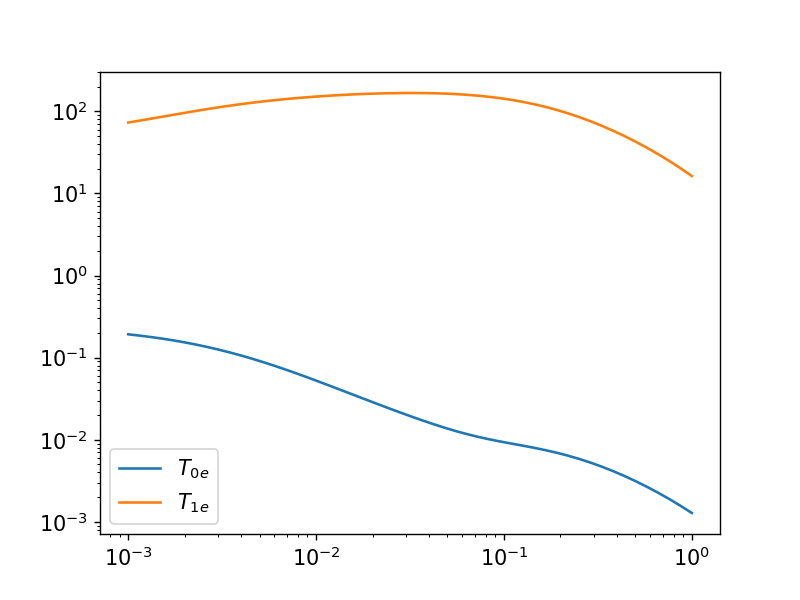

In [451]:
EL_list = np.logspace(-3 , 0, 51)

fi_ij = []
n_ij = []

E_0e = []
E_1e = []

T_0e = []
T_1e = []



J1 = 33
J2 = 1*J1+0

E_C = (1.6e-19)**2/2/c/6.64e-34 / 1e9

Q = ACQubit (E_CL = 15, 
              E_L = EL, 
              E_J = (J1+J2)/2, #33
              E_C = 8,
              dE_J = (J2-J1)/2 )  #6.5 


# Qs = [ACQubit (E_CL = 15,E_L = EL, E_J = (J1+J2)/2, E_C = 8, dE_J = (J2-J1)/2 ) for EL in EL_list] 

Qs1 = [ACQubit (E_CL = 15,E_L = EL, E_J = (J1+J2)/2, E_C = 8, dE_J = (J2-J1)/2 ) for EL in EL_list]

for q in tqdm(Qs1):
#     J1 = 33
#     J2 = 1*J1+13

#     E_C = (1.6e-19)**2/2/c/6.64e-34 / 1e9
    
#     Q = ACQubit (E_CL = 15, 
#                   E_L = EL, 
#                   E_J = (J1+J2)/2, #33
#                   E_C = 8,
#                   dE_J = (J2-J1)/2 )  #6.5 
    Q = q
    
    st0e = Q.set_state(ng = 0, fi_ext = 2*pi*0.25)
    st1e = Q.set_state(ng = 0.5, fi_ext = 2*pi*0.25)
    
    fi_ij.append( st0e.get_fi_ij(0,1) )
    n_ij.append( st1e.get_n_ij(0,1) )
    
    E_0e.append( st0e.get_E(1) - st0e.get_E(0)   )
    E_1e.append( st1e.get_E(1) - st0e.get_E(0)   )

    T_0e.append(  E_0e[-1]**-3*fi_ij[-1]**-2   )
    T_1e.append( E_1e[-1]**-1*n_ij[-1]**-2   )

    
fig, ax = plt.subplots()
ax.plot(EL_list, fi_ij, '-', label = r'$\phi_{ij}$')    
ax.plot(EL_list, n_ij, '-', label = r'$n_{ij}$')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'$n_{ij} or \phi_{ij} $')
ax.set_xlabel(r'$E_L , GHz$')

ax2 = ax.twinx()
# lim = ax.get_ylim()


# ax2.set_ylim(lim)
ax2.plot(EL_list, E_0e,'--', label = 'E0e')
ax2.plot(EL_list, E_1e, '--', label = 'E1e')
ax2.set_yscale('log')
ax2.legend()
# ax2.set_yscale('log')
# (r'$ \sqrt{S_{\phi}}(\omega)  , \frac{\Phi_0}{\sqrt{Hz}}  $ '
# ax2.set_ylabel (r'$ \sqrt{S_{n}}(\omega)  , \frac{e}{\sqrt{Hz}}  $ ', color = 'C1')


fig, ax = plt.subplots()
ax.plot(EL_list, T_0e, '-', label = '$T_{0e}$')    
ax.plot(EL_list, T_1e, '-', label = r'$T_{1e}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()